In [30]:
from warnings import filterwarnings
filterwarnings("ignore")

In [31]:
import pandas as pd

data = pd.read_csv("ghana_gdp.csv", parse_dates=["year"], index_col=["year"])
data = data.rename(columns={'GDP (current US$)':'gdp'})
data.head()

,gdp
year,
1960-01-01,1.217087e+09
1961-01-01,0.000000e+00
1962-01-01,1.382353e+09
1963-01-01,1.540616e+09
1964-01-01,1.731092e+09


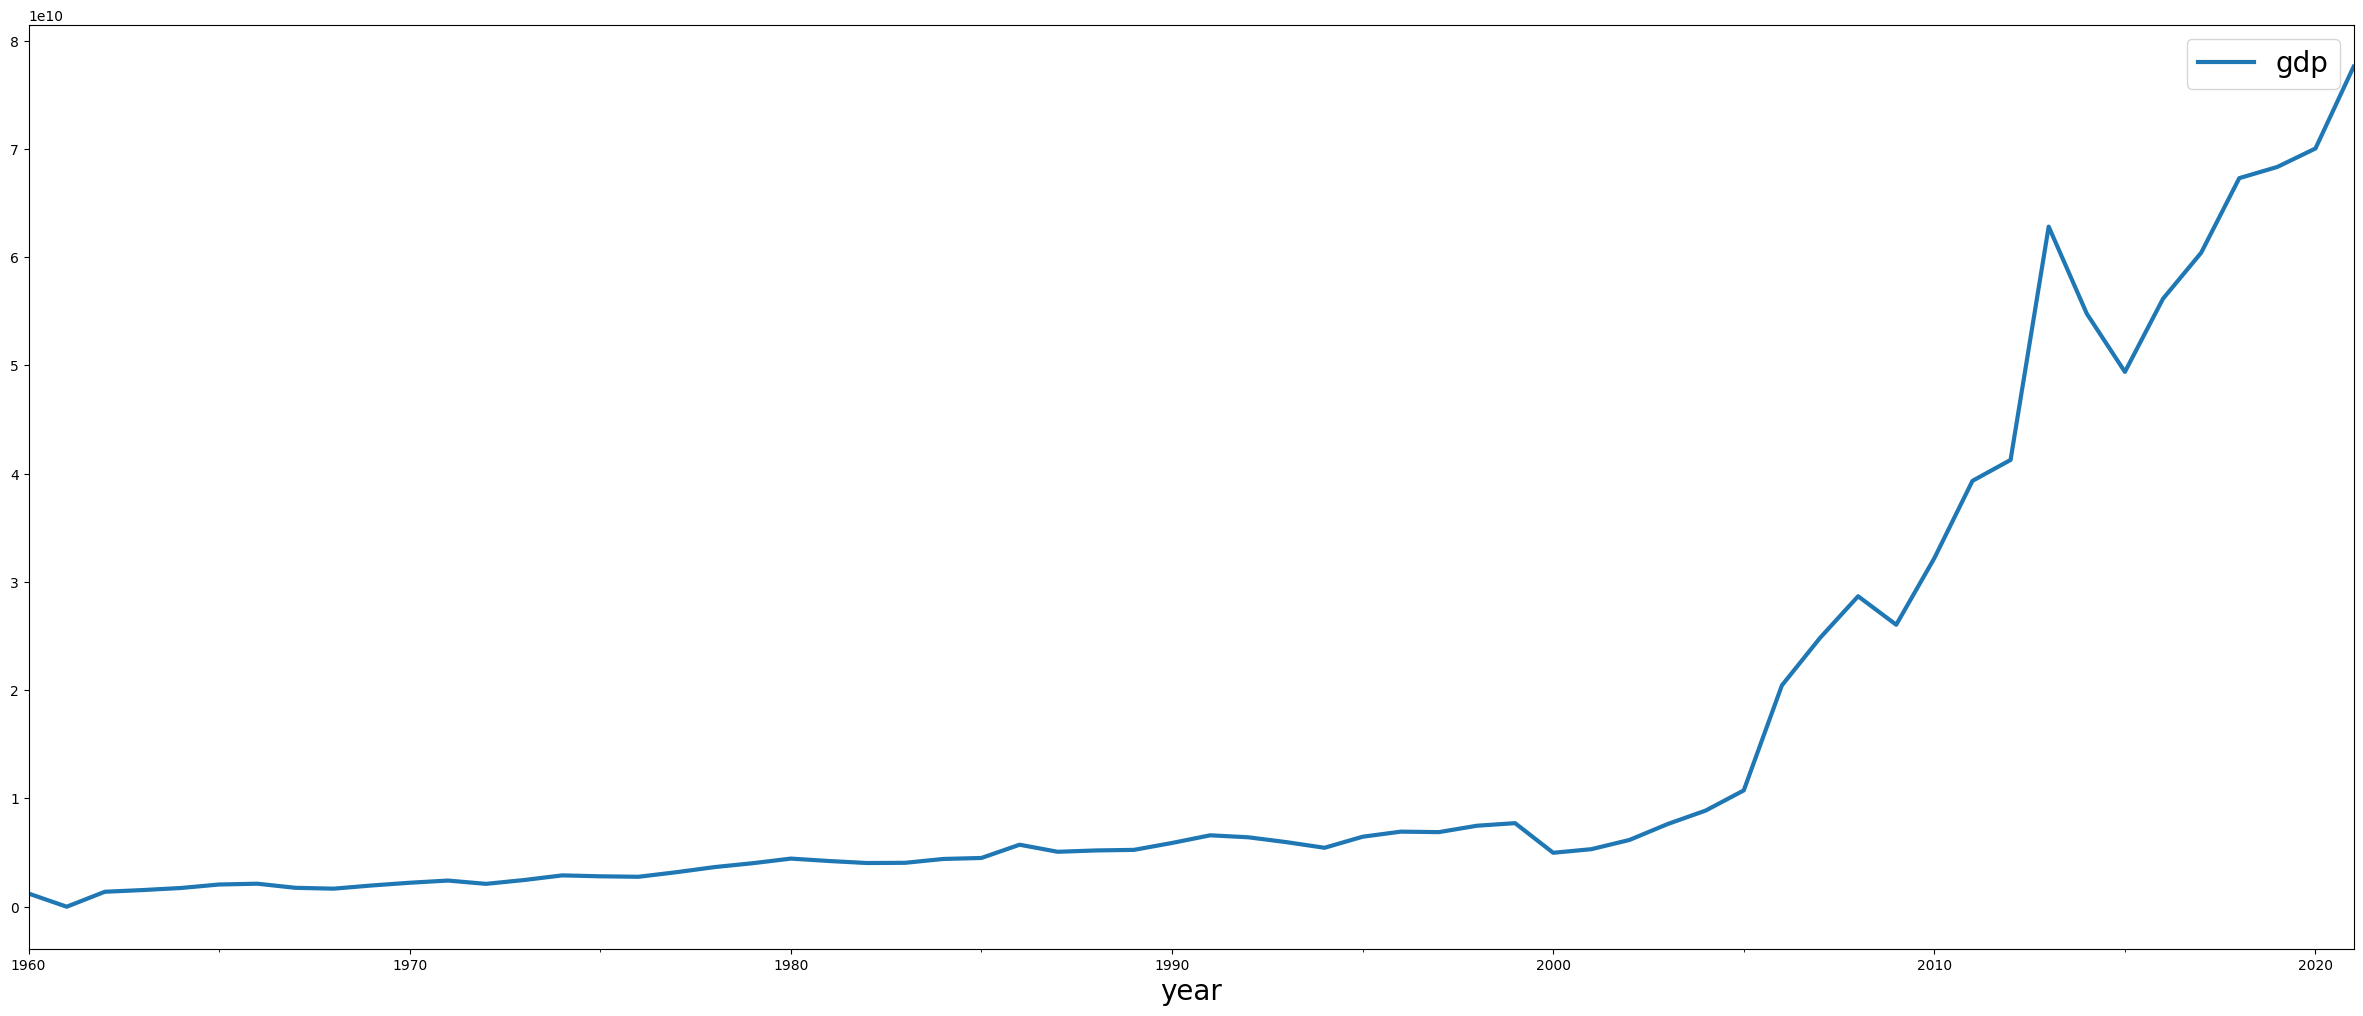

In [32]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.rcParams["figure.figsize"] = 30, 12
plt.rcParams["font.size"] = 20
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
plt.rcParams["lines.linewidth"] = 3

data.plot()
plt.show()

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62 entries, 1960-01-01 to 2021-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gdp     62 non-null     float64
dtypes: float64(1)
memory usage: 992.0 bytes


In [35]:
train_df = data.iloc[:-3]
test_df = data.iloc[-3:]
train_df.shape, test_df.shape

((59, 1), (3, 1))

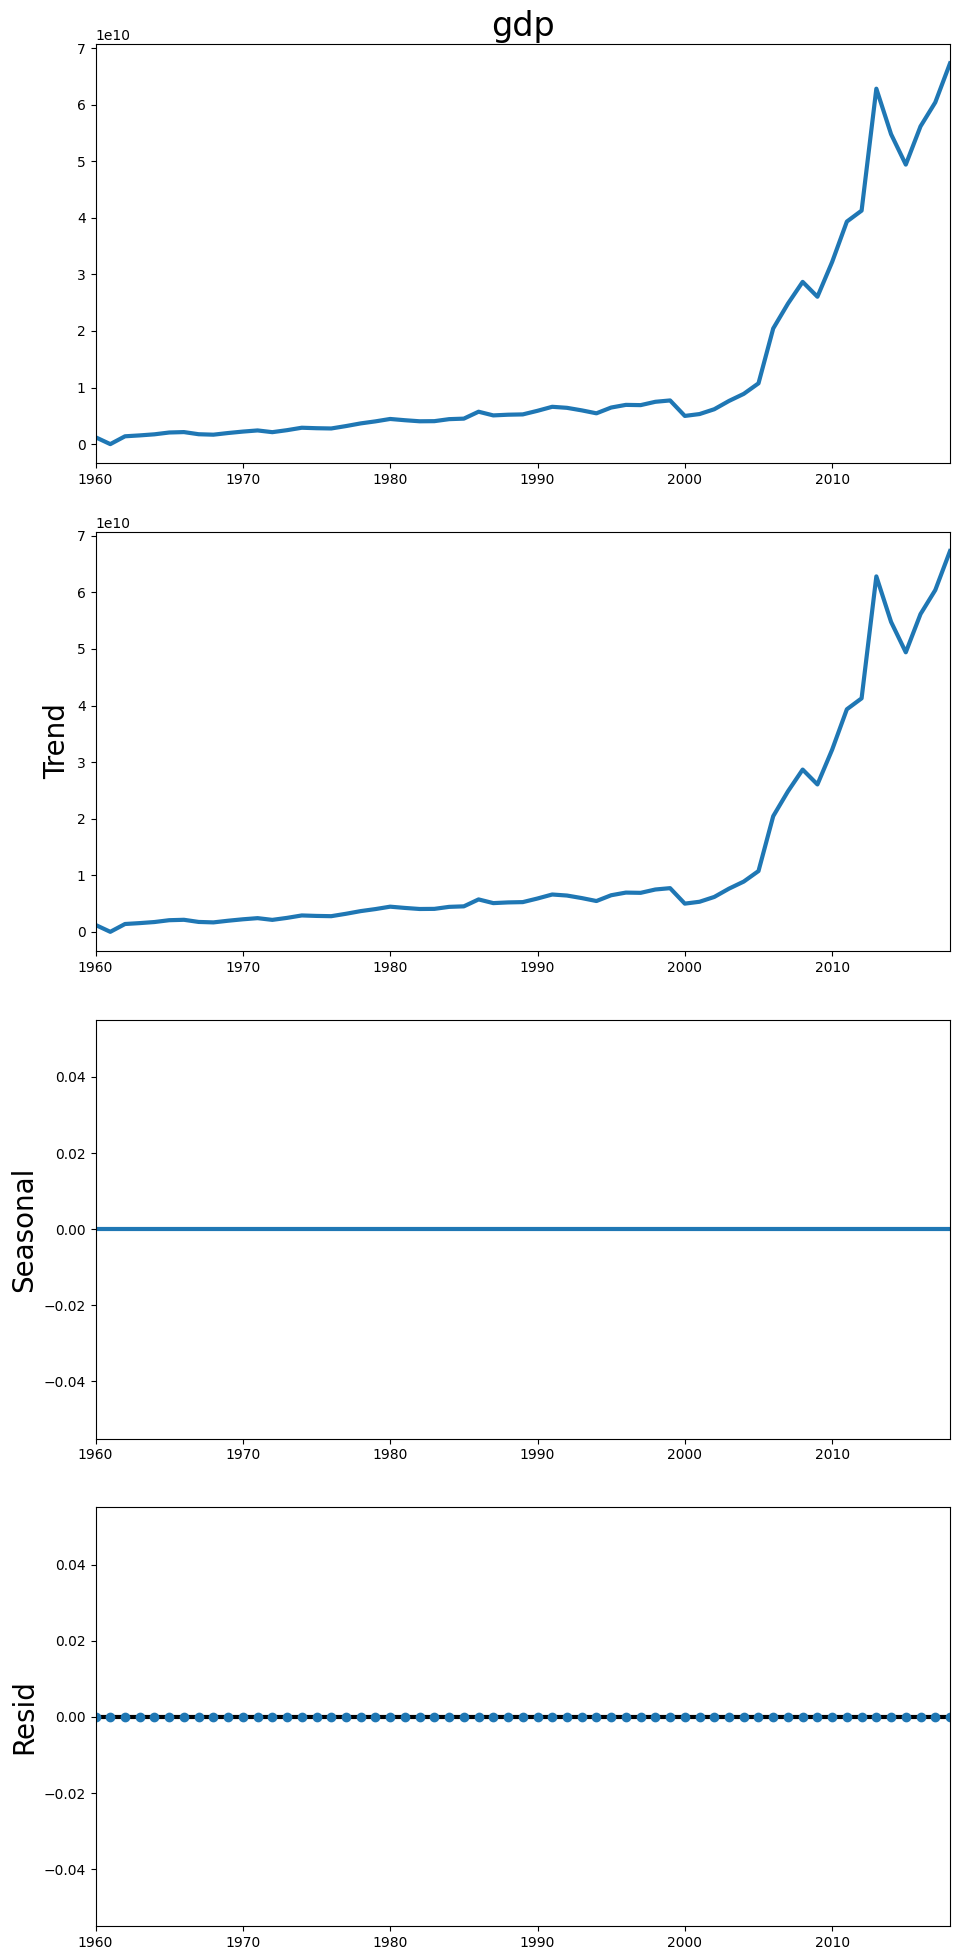

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams["figure.figsize"] = 10, 20

result = seasonal_decompose(train_df.gdp)
result.plot()
plt.show()

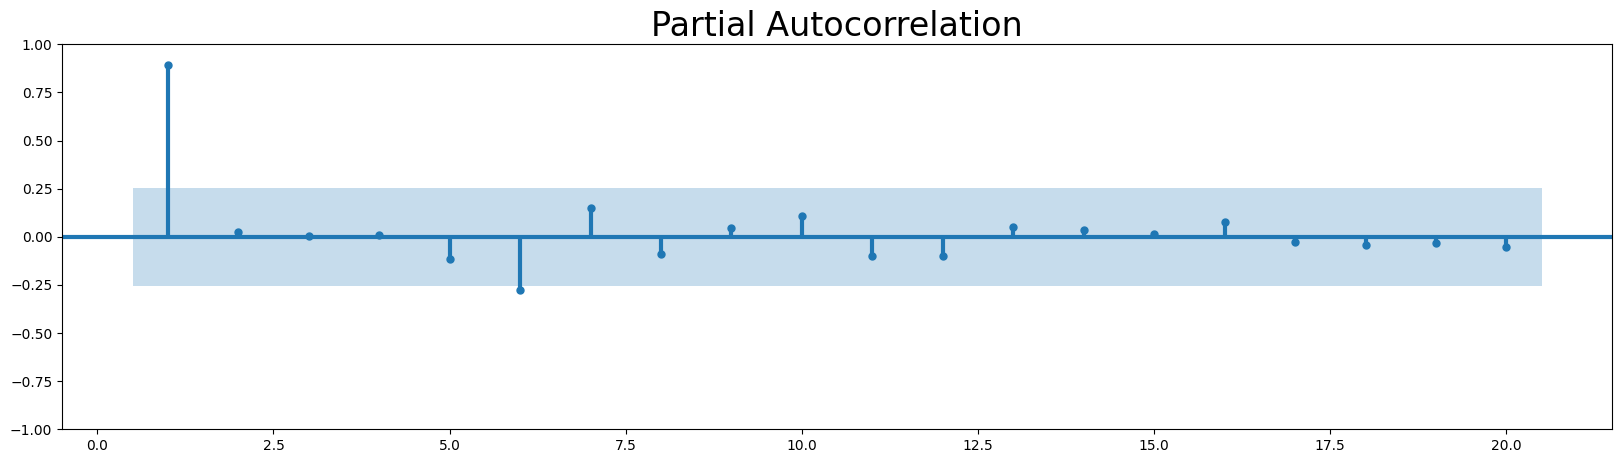

In [37]:
import statsmodels.graphics.tsaplots as sgt

plt.rcParams["figure.figsize"] = 20, 5
sgt.plot_pacf(train_df.gdp, lags=20, method="ywm", zero=False)
plt.show()

In [38]:
from statsmodels.tsa.stattools import adfuller

adfuller(train_df.gdp)

(0.6529066974885349,
 0.9888496277665572,
 10,
 48,
 {'1%': -3.5745892596209488,
  '5%': -2.9239543084490744,
  '10%': -2.6000391840277777},
 2194.301372914139)

In [40]:
test1 = adfuller(train_df.gdp)
print("adf: ", test1[0])
print("p-value: ", test1[1])
print("Critical values: ", test1[4])
if test1[0] > test1[4]["5%"]:
    print("ряд нестационарен")
else:
    print("ряд стационарен")

adf:  0.6529066974885349
p-value:  0.9888496277665572
Critical values:  {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
ряд нестационарен


In [44]:
train_df.gdp.rolling(window=2).mean()

year
1960-01-01             NaN
1961-01-01    6.085434e+08
1962-01-01    6.911765e+08
1963-01-01    1.461485e+09
1964-01-01    1.635854e+09
1965-01-01    1.892157e+09
1966-01-01    2.089636e+09
1967-01-01    1.936428e+09
1968-01-01    1.706858e+09
1969-01-01    1.814481e+09
1970-01-01    2.088540e+09
1971-01-01    2.316069e+09
1972-01-01    2.264700e+09
1973-01-01    2.288893e+09
1974-01-01    2.679951e+09
1975-01-01    2.852258e+09
1976-01-01    2.787680e+09
1977-01-01    2.977341e+09
1978-01-01    3.425953e+09
1979-01-01    3.841353e+09
1980-01-01    4.232728e+09
1981-01-01    4.333835e+09
1982-01-01    4.129218e+09
1983-01-01    4.046635e+09
1984-01-01    4.234777e+09
1985-01-01    4.458311e+09
1986-01-01    5.115972e+09
1987-01-01    5.401216e+09
1988-01-01    5.136335e+09
1989-01-01    5.224803e+09
1990-01-01    5.570470e+09
1991-01-01    6.242861e+09
1992-01-01    6.505224e+09
1993-01-01    6.190079e+09
1994-01-01    5.705408e+09
1995-01-01    5.954849e+09
1996-01-01    6.700061e

In [41]:
def plot_acf_pacf(series):
    plt.rcParams["figure.figsize"] = 18, 5

    fig, axes = plt.subplots(1, 2)

    sgt.plot_acf(series, ax=axes[0], lags=40)
    sgt.plot_pacf(series, ax=axes[1], lags=40, method="ywm")
    plt.show()

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 40 must be < 29.

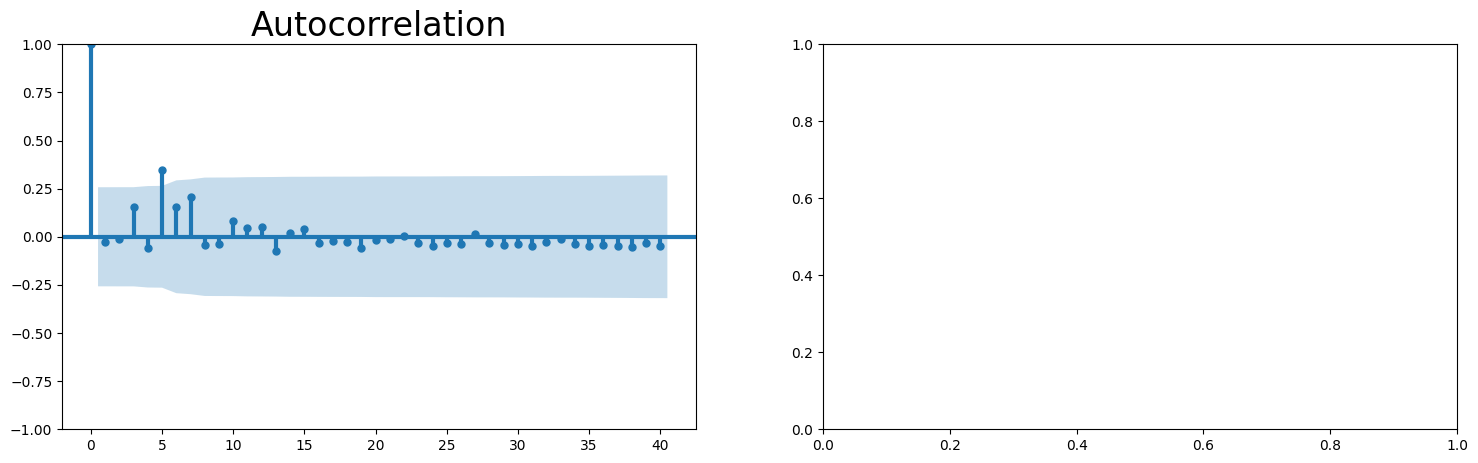

In [42]:
plot_acf_pacf(train_df["gdp"].diff().dropna())
adfuller(train_df["gdp"].diff().dropna())

In [25]:
import statsmodels.api as sm

In [28]:
def stat_test(df):
    test = sm.tsa.adfuller(df)
    print ('adf: ', test[0] )
    print ('p-value: ', test[1])
    print('Critical values: ', test[4])
    if test[0]> test[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен')
    else:
        print ('единичных корней нет, ряд стационарен')

stat_test(train_df)

adf:  0.6529066974885349
p-value:  0.9888496277665572
Critical values:  {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
есть единичные корни, ряд не стационарен
